In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# read csv
data = pd.read_pickle("./datasets/All.pickle")
data.index = pd.DatetimeIndex(data.DateTime)
data.head()

,NO2-ug-per-m3,Cars-Direction-1,Cars-Direction-2,Cars-Total,Day-Of-Week,Monday,Tuesday,Wednesday,Thursday,Friday,...,Number of vessels,DateTime,DaySin,DayCos,WeekSin,WeekCos,MonthSin,MonthCos,YearSin,YearCos
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,19.0,36,62,98,2,0,1,0,0,0,...,6,2019-01-01 00:00:00,0.000000,1.000000,0.781831,0.62349,0.201299,0.97953,0.017213,0.999852
2019-01-01 01:00:00,11.0,109,112,221,2,0,1,0,0,0,...,4,2019-01-01 01:00:00,0.258819,0.965926,0.781831,0.62349,0.201299,0.97953,0.017213,0.999852
2019-01-01 02:00:00,9.0,97,60,157,2,0,1,0,0,0,...,2,2019-01-01 02:00:00,0.500000,0.866025,0.781831,0.62349,0.201299,0.97953,0.017213,0.999852
2019-01-01 03:00:00,7.0,60,44,104,2,0,1,0,0,0,...,4,2019-01-01 03:00:00,0.707107,0.707107,0.781831,0.62349,0.201299,0.97953,0.017213,0.999852
2019-01-01 04:00:00,8.0,44,33,77,2,0,1,0,0,0,...,3,2019-01-01 04:00:00,0.866025,0.500000,0.781831,0.62349,0.201299,0.97953,0.017213,0.999852


In [9]:
smaller_data = data.sample(frac=0.3)
len(smaller_data)

2416

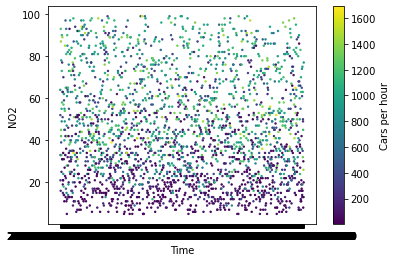

'(Color: cars total) NO2 correlates with cars'

In [10]:
plt.figure()
plt.scatter(smaller_data["DateTime"], smaller_data["NO2-ug-per-m3"], s=2, c=smaller_data["Cars-Total"])
plt.xlabel("Time")
plt.ylabel("NO2")
cb = plt.colorbar()
cb.set_label("Cars per hour")
plt.show()
display("(Color: cars total) NO2 correlates with cars")

<Figure size 432x216 with 0 Axes>

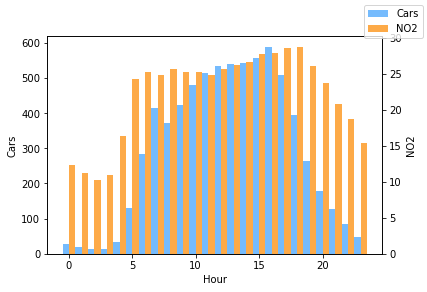

In [50]:
# NO2 in relation to hourly cars
def cars_hourly(data):
    # array for 24 hours for "Cars-Total"
    cars = np.zeros(24)
    cars_sample_counter = np.zeros(24)
    # array for 24 hours for "NO2"
    no2 = np.zeros(24)
    cars_sample_counter = np.zeros(24)
    # iterate over data and put NO2 and Cars-Total in arrays
    for i in range(len(data)):
        # get hour from column "DateTime" like this  "2019-01-02 04:00:00"
        hour = data.iloc[i]["DateTime"].hour
        cars[hour] += data["Cars-Total"][i]
        cars_sample_counter[hour] += 1
        no2[hour] += data["NO2-ug-per-m3"][i]
        cars_sample_counter[hour] += 1

    # to erase the different sample sizes we divide by the sample size
    cars = cars / cars_sample_counter
    no2 = no2 / cars_sample_counter

    # plot "cars" and "no2" as lines in ax1 and ax2 but in one graph
    # "no2" is red
    plt.figure(figsize=(6,3))
    fig, ax1 = plt.subplots()
    ax1.bar(np.arange(len(cars))-0.25,cars, color="xkcd:sky blue", width=0.5, label="Cars")
    ax1.set_xlabel("Hour")
    ax1.set_ylabel("Cars")
    ax2 = ax1.twinx()
    ax2.bar(np.arange(len(no2)) + 0.25,no2, color="xkcd:light orange", width=0.5, label="NO2")
    ax2.set_ylabel("NO2")
    fig.legend()
    plt.show()

cars_hourly(data)


<Figure size 432x288 with 0 Axes>

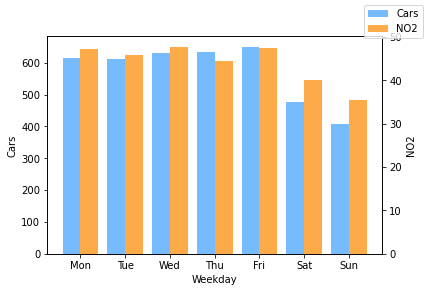

In [53]:
# NO2 in relation to cars on week days
def cars_weekdays(data):
    # array for 7 days of the week
    cars = np.zeros(7)
    cars_sample_counter = np.zeros(7)
    # array for 7 days of the week
    no2 = np.zeros(7)
    no2_sample_counter = np.zeros(7)
    # iterate over data and put NO2 and Cars-Total in arrays
    for i in range(len(data)):
        # get weekday from column "DateTime" like this  "2019-01-02 04:00:00"
        weekday = data.iloc[i]["DateTime"].weekday()
        cars[weekday] += data["Cars-Total"][i]
        cars_sample_counter[weekday] += 1
        no2[weekday] += data["NO2-ug-per-m3"][i]
        no2_sample_counter[weekday] += 1

    # to erase the different sample sizes we divide by the sample size
    cars = cars / cars_sample_counter
    no2 = no2 / no2_sample_counter

    # plot "cars" and "no2" as lines in ax1 and ax2 but in one graph
    # "no2" is red
    plt.figure()
    fig, ax1 = plt.subplots()
    ax1.bar(np.arange(len(cars))-0.20,cars, width=0.4, color="xkcd:sky blue", label="Cars")
    ax1.set_xlabel("Weekday")
    ax1.set_ylabel("Cars")
    ax2 = ax1.twinx()
    ax2.bar(np.arange(len(no2)) + 0.20,no2,width=0.4, color="xkcd:light orange", label="NO2")
    ax2.set_ylabel("NO2")
    fig.legend(loc="upper right")
    plt.xticks(ticks=np.arange(7),labels=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
    plt.show()
cars_weekdays(data)


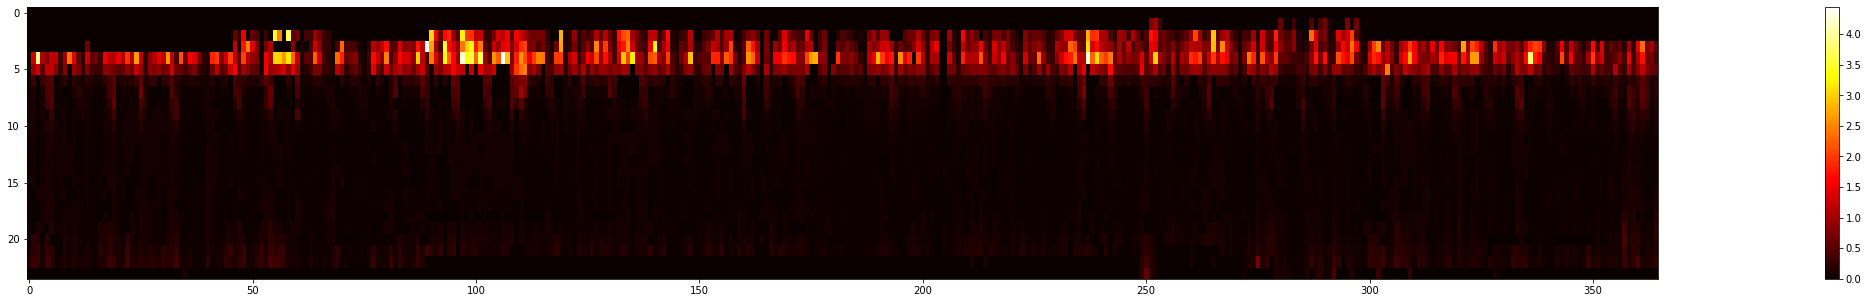

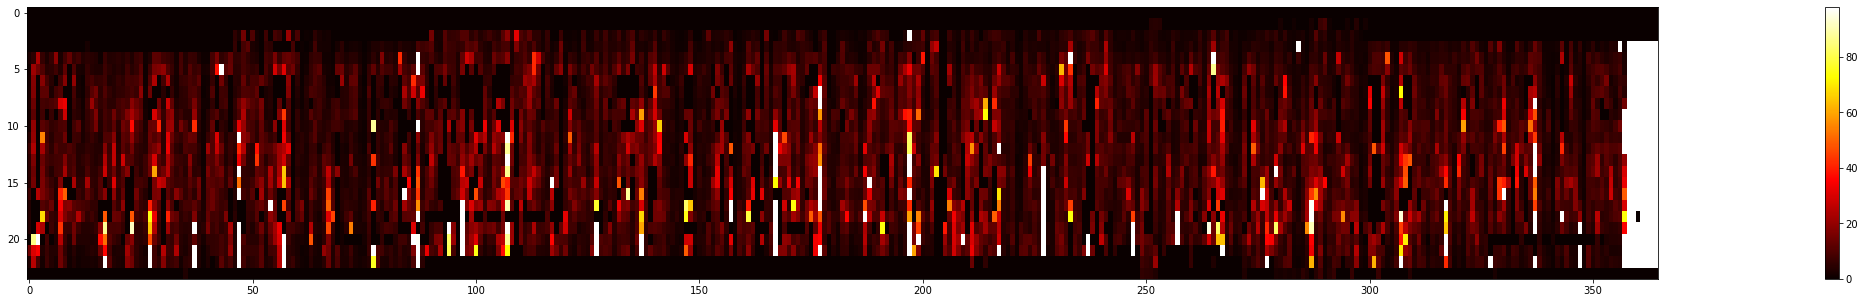

In [69]:
import numpy as np

def yearmap(data, column) :
    # array with 365 days on axis 0 and 24 hours on axis 1
    array = np.zeros((24, 365))
    # iterate over data and put NO2 and Cars-Total in array
    for i in range(len(data)):
        date_time = data.iloc[i]["DateTime"]
        day_of_year = date_time.dayofyear
        hour = date_time.hour

        array[hour][day_of_year-1] += column[i]

    # plot matrix as square heatmap
    plt.figure(figsize=(60, 5))
    plt.imshow(array, cmap="hot", interpolation="nearest",
               aspect=(365/24)/6)
    plt.colorbar()

    plt.show()


yearmap(data, data["NO2"]/data["Cars-Total"])
yearmap(data, data["NO2"]/data["Number of vessels"])


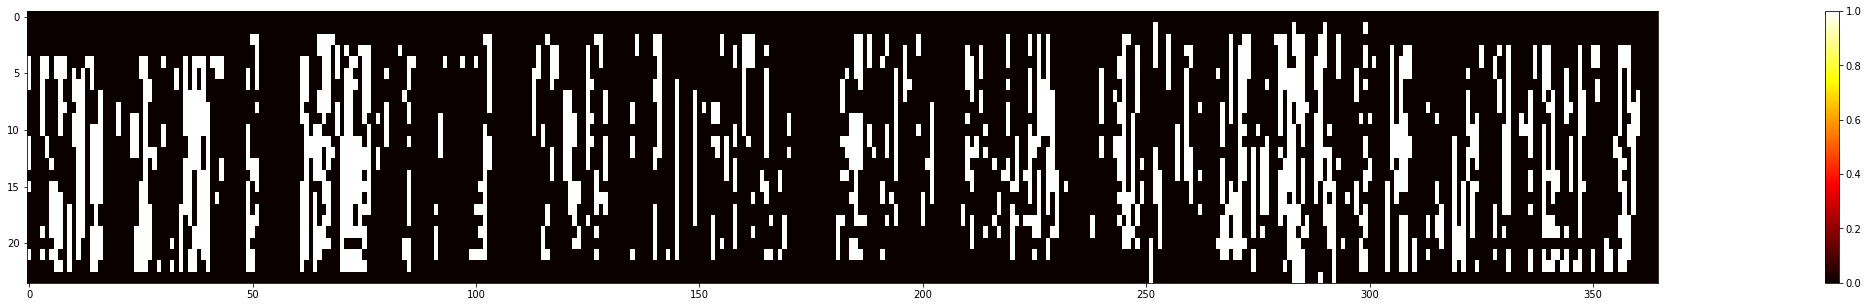

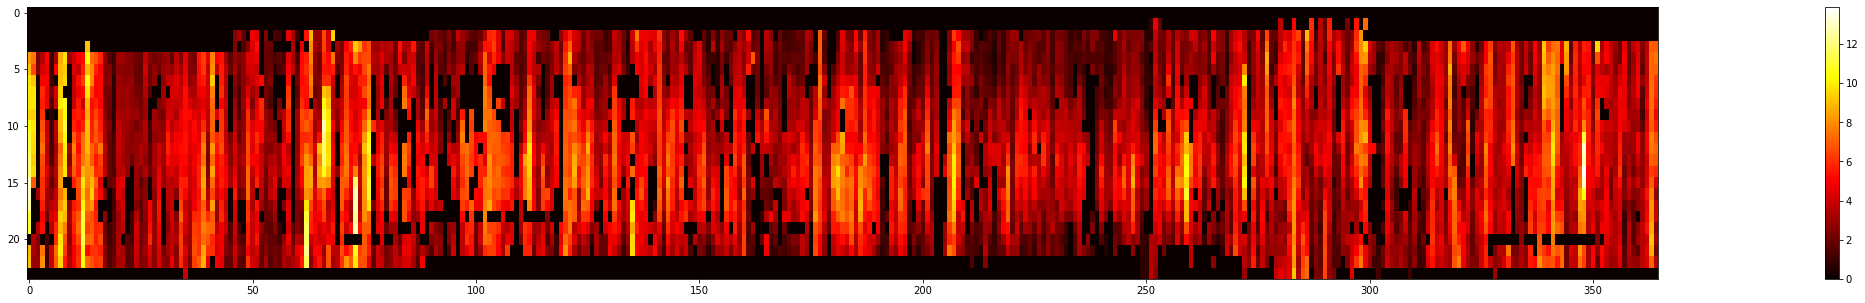

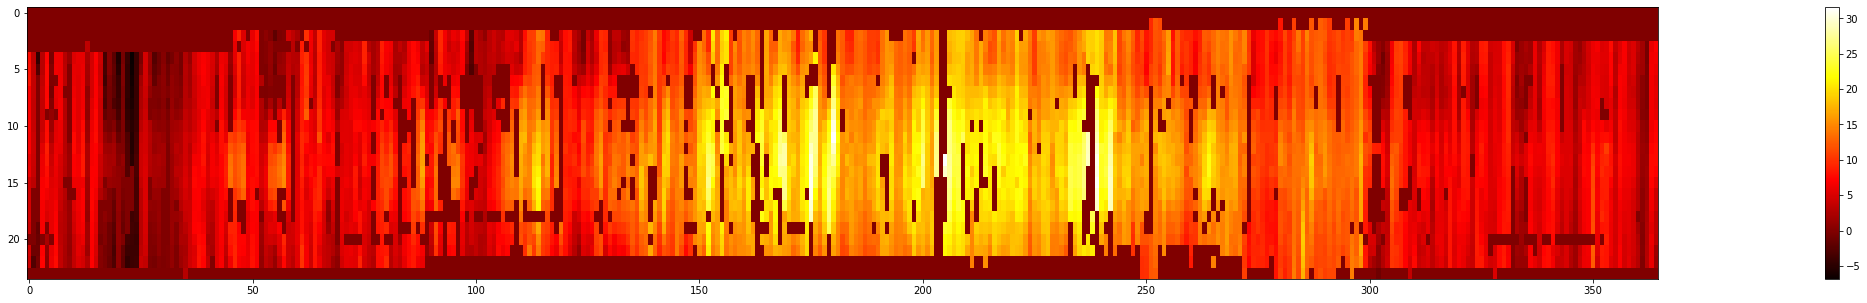

In [73]:
yearmap(data, data["did_it_rain"])
yearmap(data, data["wind_meters_per_second"])
yearmap(data, data["air_temp_deg_c"])


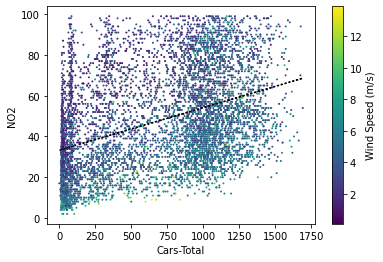

'Color: Wind speed (Strong wind -> Less NO2 measured)'

In [21]:
plt.figure()
plt.scatter(data["Cars-Total"], data["NO2"], s=1, c=data["wind_meters_per_second"])
m,c = np.polyfit(data["Cars-Total"], data["NO2"], 1)
plt.plot(data["Cars-Total"], m*data["Cars-Total"]+c, c="black", linestyle="dotted")
plt.xlabel("Cars-Total")
plt.ylabel("NO2")
cb = plt.colorbar()
cb.set_label("Wind Speed (m/s)")
plt.show()
display("Color: Wind speed (Strong wind -> Less NO2 measured)")

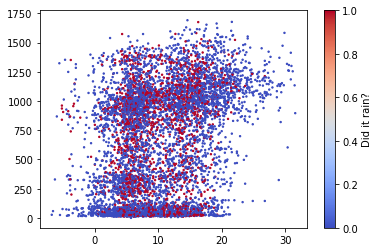

'(Color: red=rain, blue=dry) Car traffic does not seem to be correlated with temperature'

In [22]:
plt.figure()
plt.scatter(data["air_temp_deg_c"], data["Cars-Total"], s=2, c=data["did_it_rain"], cmap="coolwarm")
cb = plt.colorbar()
cb.set_label("Did it rain?")
plt.show()
display("(Color: red=rain, blue=dry) Car traffic does not seem to be correlated with temperature")

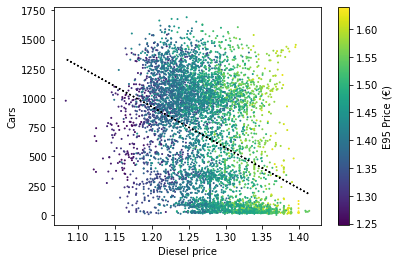

'(Color: gas price) Cheaper diesel fuel means more traffic'

In [23]:
plt.figure()
plt.scatter(data["diesel"], data["Cars-Total"], s=1, c=data["e5"])
m,c = np.polyfit(data["diesel"], data["Cars-Total"], 1)
plt.plot(data["diesel"], m*data["diesel"]+c, c="black", linestyle="dotted")
plt.xlabel("Diesel price")
plt.ylabel("Cars")
cb = plt.colorbar()
cb.set_label("E95 Price (€)")
plt.show()
display("(Color: gas price) Cheaper diesel fuel means more traffic")

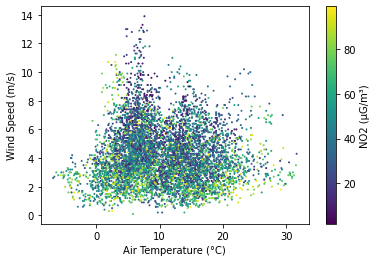

In [24]:
plt.figure()
plt.scatter(data["air_temp_deg_c"], data["wind_meters_per_second"], s=1, c=data["NO2"])
plt.xlabel("Air Temperature (°C)")
plt.ylabel("Wind Speed (m/s)")
cb = plt.colorbar()
cb.set_label("NO2 (µG/m³)")
plt.show()

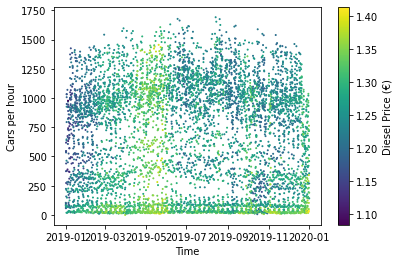

In [25]:
plt.figure()
plt.scatter(data["DateTime"],data["Cars-Total"], c=data["diesel"], s=1)
plt.xlabel("Time")
plt.ylabel("Cars per hour")
cb = plt.colorbar()
cb.set_label("Diesel Price (€)")
plt.show()